In [2]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Juntar todas as imagens em uma única
def merge_images(image_folder):
    images = [Image.open(os.path.join(image_folder, img)) for img in os.listdir(image_folder) if img.endswith(('png', 'jpg', 'jpeg'))]
    widths, heights = zip(*(img.size for img in images))
    total_width = sum(widths)
    max_height = max(heights)
    merged_image = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for img in images:
        merged_image.paste(img, (x_offset, 0))
        x_offset += img.width
    return merged_image

# Caminho da pasta com as imagens
image_folder = "C:/Users/vinicius.silva/Downloads/Inatel/P7/Projeto 1 2025/Projeto 1/"

# Executando as etapas
merged_image = merge_images(image_folder)

final_image = merged_image.copy()
final_image.show()


Primeiro importamos as bibliotecas necessárias e criamos a função para juntar todas as imagens.

A função recebe o caminho das imagens e junta todas em uma só, somando as larguras e pegando a altura da maior imagem.

In [3]:
# 2. Trocar as cores somente dos pinguins, mantendo as cores do fundo iguais
def change_colors(image):
    grayscale_image = ImageOps.grayscale(image)
    threshold = 200  # Ajuste o valor do threshold conforme necessário
    binary_mask = np.array(grayscale_image) < threshold  # Identificar os pinguins
    colorized_image = Image.new("RGB", image.size)
    colorized_image.paste(image)  # Manter as cores originais do fundo
    penguin_layer = ImageOps.colorize(grayscale_image, black="blue", white="yellow")
    colorized_image.paste(penguin_layer, mask=Image.fromarray(binary_mask))
    return colorized_image

colored_image = change_colors(merged_image)

final_image = colored_image.copy()
final_image.show()

Após juntar todas as imagens, criamos a função para mudar as cores dos pinguins de acordo com o threshold das imagens em grayscale.

In [4]:
# 3. Aplicar o espelhamento
def apply_mirroring(image):
    return ImageOps.mirror(image)

mirrored_image = apply_mirroring(colored_image)

final_image = mirrored_image.copy()
final_image.show()

Da biblioteca PIL, para facilitar, utilizamos a função mirror para espelhar os pinguins

In [5]:
# 4. Recortar seu pinguim favorito
def crop_favorite_penguin(image, crop_box):
    return image.crop(crop_box)

# Defina a área de recorte (exemplo: (x1, y1, x2, y2))
crop_box = (860, 0, 1680, 1109)
favorite_penguin = crop_favorite_penguin(mirrored_image, crop_box)

final_image = favorite_penguin.copy()
final_image.show()

Utilizamos a função crop e fazemos os cálculos da posição do pinguin favorito, então cortamos a imagem a partir dos pixels calculados para termos somente um pinguim

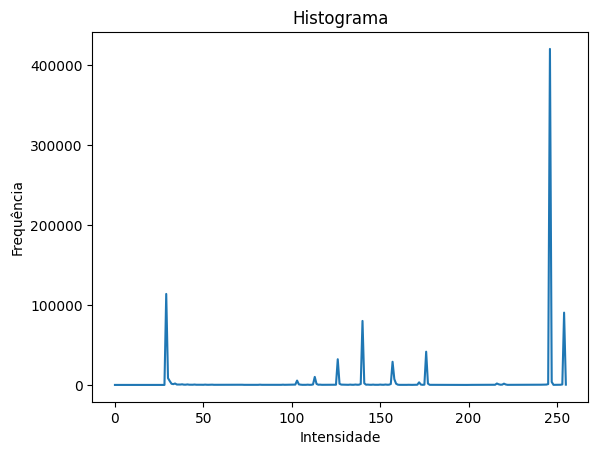

In [6]:
# 5. Análise do histograma e escolha do threshold
def analyze_histogram(image):
    grayscale_image = image.convert("L")
    histogram = grayscale_image.histogram()
    plt.figure()
    plt.title("Histograma")
    plt.xlabel("Intensidade")
    plt.ylabel("Frequência")
    plt.plot(histogram)
    plt.show()


threshold = analyze_histogram(favorite_penguin)



Aqui verificamos com qual intensidade as seguintes frequências aparecem na imagem do pinguim cortado, e verificamos que o threshold para a próxima função deve ser por volta de 150 para que seja feita a mudança da cor do pinguim

In [7]:
# 6. Aplicar threshold e pintar pixels abaixo dele
def apply_threshold(image, threshold, color):
    grayscale_image = image.convert("L")
    binary_image = np.array(grayscale_image) < threshold
    result_image = Image.new("RGB", image.size, color)
    result_image.paste(image, mask=Image.fromarray(~binary_image))
    return result_image

final_image = apply_threshold(favorite_penguin, 150, (0, 0, 255))  # Pintar pixels abaixo do threshold de vermelho

# Exibir a imagem final

final_image.show()